# Summary

This document reads the data and computes several simple metrics using datasets provided in the exercise.  It also exports pre-processed dataset to several formats for subsequent data visualization. Finally, it discusses churn rate for users.

***



In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Let's read some transaction data

file = 'Downloads/2017-07_sr_data_analyst_task_(1)/transactions.csv'

transactions = pd.read_csv(file)
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.index = transactions['date']

transactions.head()
transactions.info()

# Just some descriptive stats

transactions.describe()

,user_id,type,date
date,,,
2016-02-20,2e23e35fe0792367688afae1cc53888a,DT,2016-02-20
2016-02-02,3ba7ca60e456bc7b51ebad18b5c48d8e,CT,2016-02-02
2016-01-12,f07d0faffa7d7e53af39e234e8ed0fab,CT,2016-01-12
2016-01-27,76f311b289ab20e3c1d5a8e2f8fb4407,PT,2016-01-27
2016-06-23,f37e9faf22fa9dd12a43c32afeae5df8,DD,2016-06-23


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23721 entries, 2016-02-20 to 2016-04-01
Data columns (total 3 columns):
user_id    23721 non-null object
type       23721 non-null object
date       23721 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 741.3+ KB


,user_id,type,date
count,23721,23721,23721
unique,7077,5,332
top,037c76908f8f5cb1c45c559c46c1f3c3,CT,2016-02-02 00:00:00
freq,5,7002,596
first,NaN,NaN,2016-01-01 00:00:00
last,NaN,NaN,2016-11-27 00:00:00


# KPI 1: Average number of transactions per client in 2016

In [98]:
transactions.groupby('user_id')['type'].count().mean()

3.3518440016956337

# KPI 2:  Monthly volume of transactions

In [99]:
volume = transactions.resample('M').type.count()
volume

date
2016-01-31    4532
2016-02-29    8551
2016-03-31    3718
2016-04-30    2016
2016-05-31    1159
2016-06-30     868
2016-07-31     794
2016-08-31     638
2016-09-30     575
2016-10-31     533
2016-11-30     337
Freq: M, Name: type, dtype: int64

There is a marked seasonal trend in terms of number user transactions with winter months having a higher volume.

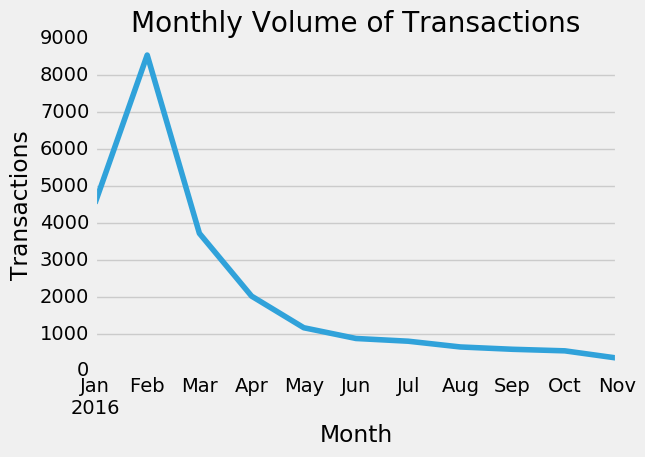

In [100]:
my_plot = volume.plot(kind='line', title='Monthly Volume of Transactions')
my_plot.set_ylabel("Transactions")
my_plot.set_xlabel("Month")
plt.style.use('fivethirtyeight')
plt.show()

# KPI 3: Growth rate in customer transactions

Let's examine the growth in the number of transaction at the beginning of the year and the total (cumulatative) number of transaction for the year.

In [101]:
beginning = volume["2016-01-31"]
end = volume.sum()

In [102]:
float(end)/beginning*100

523.4112974404237

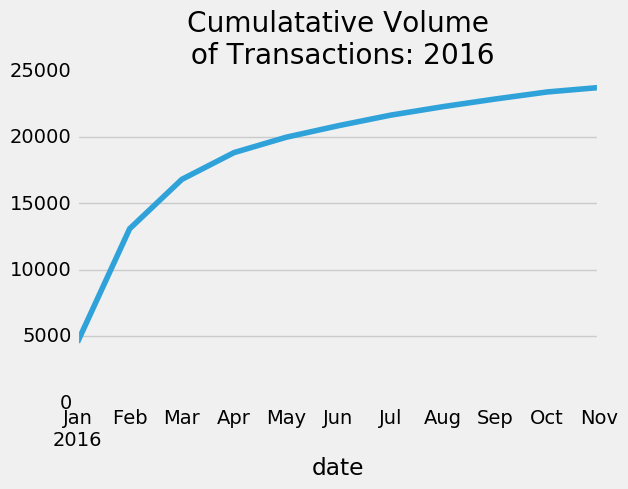

In [103]:
volume.cumsum().plot(title= "Cumulatative Volume\n of Transactions: 2016")
plt.show()

# KPI 4: Most common type of transactions

We can now examine the most common type of transation. For this, we will import data dictionary containing the detailed 
description of each transaction.

In [104]:
# let's add data dictionary to get transactions type

file = 'Downloads/2017-07_sr_data_analyst_task_(1)/transaction_types.csv'
type_trans = pd.read_csv(file)
type_trans.head()

type_trans.columns.values

# Looks like there's some empty space in the column name, which we should remove

type_trans = type_trans.rename(columns=lambda x: x.strip())

,type,explanation
0,CT,Credit Transfer (Incoming SEPA Transfer)
1,PT,Card Transaction
2,DT,Direct Transfer (Outgoing SEPA Transer)
3,DD,Direct Debit
4,FT,MoneyBeam


array(['type', 'explanation '], dtype=object)

In [105]:
combined = pd.merge(transactions,type_trans,how="left",left_on="type",right_on="type")
combined['explanation'].value_counts().idxmax()

'Credit Transfer (Incoming SEPA Transfer)'

It appears that _Credit Transfers_ was the most common type of transaction in 2016. Let's create a simple bar plot to examine this information visually and a larger context. The output below provides more detailed information by transaction type.

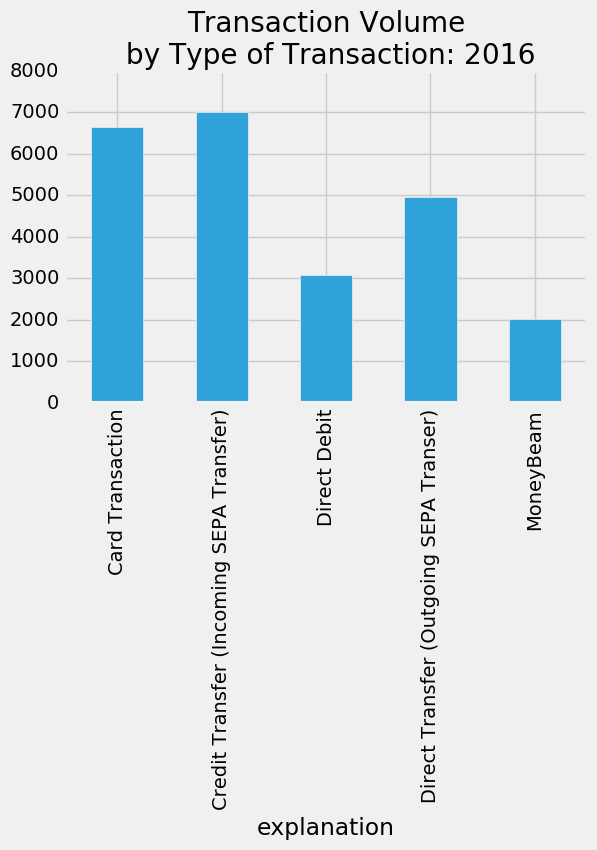

In [106]:
combined.groupby('explanation')['explanation'].count().plot(kind = 'bar', title="Transaction Volume\n by Type of Transaction: 2016")
plt.show()

In [107]:
combined.groupby('explanation')['explanation'].count()

explanation
Card Transaction                            6642
Credit Transfer (Incoming SEPA Transfer)    7002
Direct Debit                                3084
Direct Transfer (Outgoing SEPA Transer)     4961
MoneyBeam                                   2032
Name: explanation, dtype: int64

In [108]:
file = 'Downloads/2017-07_sr_data_analyst_task_(1)/users.csv'
user = pd.read_csv(file)
user.describe()

,user_id,invited,sign_up,kyc_initiated,kyc_completed,card_activated
count,10645,1738,10645,8875,7684,7286
unique,10645,125,45,231,215,303
top,817c65572fdb0384b8167715cbd3e842,2016-01-27,2016-01-27,2016-02-02,2016-02-02,2016-02-11
freq,1,58,354,291,248,231


# KPI 5: Growth in the New User Registrations

Let's examine number of new signups in the first two months of 2016 and the growth between two time periods.

In [109]:
user['sign_up'] = pd.to_datetime(user['sign_up'])
user.index = user['sign_up']
users = user.resample('M').user_id.count()
users

sign_up
2016-01-31    7227
2016-02-29    3418
Freq: M, Name: user_id, dtype: int64

The number of new registrations in February is much lower when compared to January. However, if we compare beginning of the year versus cumulatative total, there's a clear growth. 

In [110]:
User_beginning = users["2016-01-31"]
User_end = users.sum()
float(User_end)/User_beginning*100

147.29486647294868

#  Other KPIs:

### Percent of users with KYC initiated

In [111]:
float(user.kyc_initiated.count())/user.sign_up.count()*100

83.37247534053547

### Percent passing KYC

In [112]:
float(user.kyc_completed.count())/user.kyc_initiated.count()*100

86.58028169014085

# File Export

***

Using pandas  to_csv  and  to_json methods to export to a different formats.

In [113]:
to_export = combined.groupby('explanation')['type'].count().to_frame()
to_export.reset_index(level=1)
to_export.to_csv('export.csv')

,explanation,type
0,Card Transaction,6642
1,Credit Transfer (Incoming SEPA Transfer),7002
2,Direct Debit,3084
3,Direct Transfer (Outgoing SEPA Transer),4961
4,MoneyBeam,2032


Just an example of how to export to json. This can be copied and pasted directly into html file or loaded externally.

In [114]:
toexport = to_export.reset_index()
toexport.to_json(orient='records').replace('},{', '} {')

'[{"explanation":"Card Transaction","type":6642} {"explanation":"Credit Transfer (Incoming SEPA Transfer)","type":7002} {"explanation":"Direct Debit","type":3084} {"explanation":"Direct Transfer (Outgoing SEPA Transer)","type":4961} {"explanation":"MoneyBeam","type":2032}]'

# Churn Rate

***


The _churn rate_ can be defined as a percentage of users/clients who terminate or discontinue using services offered by N26 within established time frame typically a year. To calculate the churn rate we would need to get a datafile containing number of users who stopped using N26 and divide it by the total number of _active users_. The _users.csv_ can be used to calculate denominator; datafile for numerator is not provided in this exercise.

Churn rate is an important metric since it relates to the number of customers, ability to provide loans and the overall financial stability of the given bank. Churn rate can provide key insights into why customer leave the institution, their level of satisfaction, and their overall level of interaction with the bank. Finally, it also poses questions related to retention strategies.